2.3410909966694424 3.079533800999168
2.471982059117402 1.7275387110741052
10559.12227146448 5609.744880170736
avg rt percentage change 0.46873000085141525
11967.966355857374
Isolert gj. snitt temp: 23.712513537933233, uisolert gj. snitt temp: 39.40377438611392


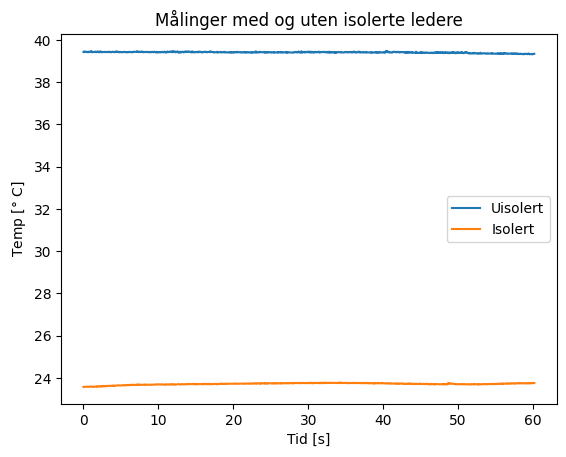

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
R0 = 10_000

# enkle hjelpefunksjoner
def R_to_T(R):
    invT = (1/T0) + (1/B)*np.log(R/R0)
    return 1/invT - 273.15

def get_RT(vt, vr):
    return R0 * vt/vr

# les inn datasett
df_isolated = pd.read_csv("isolated_steady_in_water")
df_uninsolated = pd.read_csv("no_isolation_steady_in_water")

avg_vr_isolated = np.average(df_isolated["vr"])
avg_vr_unisolated = np.average(df_uninsolated["vr"])
print(avg_vr_isolated, avg_vr_unisolated)

avg_vt_isolated = np.average(df_isolated["vt"])
avg_vt_unisolated = np.average(df_uninsolated["vt"])

print(avg_vt_isolated, avg_vt_unisolated)

avg_rt_isolated = np.average(get_RT(df_isolated["vt"], df_isolated["vr"]))
avg_rt_unisolated = np.average(get_RT(df_uninsolated["vt"], df_uninsolated["vr"]))
print(avg_rt_isolated, avg_rt_unisolated)

print(f"avg rt percentage change {1-(avg_rt_unisolated/avg_rt_isolated)}")

#calc vann ledningsevne
avg_rl = (avg_rt_isolated*avg_rt_unisolated)/(avg_rt_isolated-avg_rt_unisolated)
print(avg_rl)


B   = 3740      # fra datablad
R0  = 12_000    # fra datablad
T0 = 273.15+25  # romtemp i kelvin

isolated_temps = R_to_T(get_RT(df_isolated["vt"], df_isolated["vr"]))
uninsolated_temps = R_to_T(get_RT(df_uninsolated["vt"], df_uninsolated["vr"]))

avg_temp_isolated = np.average(isolated_temps)
avg_temp_unisolated = np.average(uninsolated_temps)

print(f"Isolert gj. snitt temp: {avg_temp_isolated}, uisolert gj. snitt temp: {avg_temp_unisolated}")

plt.plot(df_uninsolated["t"], uninsolated_temps,label="Uisolert")
plt.plot(df_isolated["t"], isolated_temps,label="Isolert")
plt.title("Målinger med og uten isolerte ledere")
plt.ylabel("Temp [$\degree$ C]")
plt.xlabel("Tid [s]")
plt.legend()
plt.savefig("del_a.pdf")

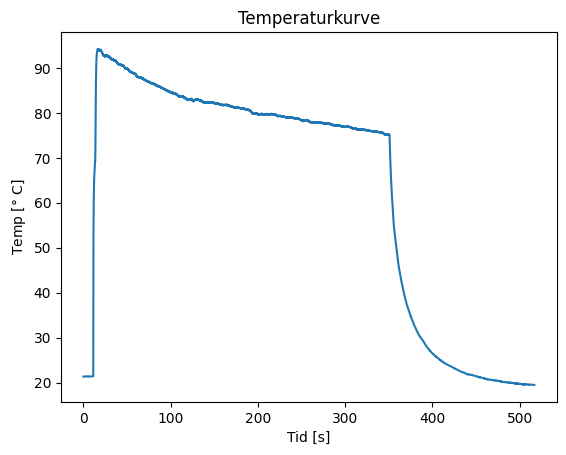

In [92]:
df_temp = pd.read_csv("temperature_curve_1")

plt.plot(df_temp["t"], df_temp["temp"])


plt.title("Temperaturkurve")
plt.ylabel("Temp [$\degree$ C]")
plt.xlabel("Tid [s]")
#plt.xlim(10,20)

plt.savefig("del_b.pdf")

-0.0037337910779696496


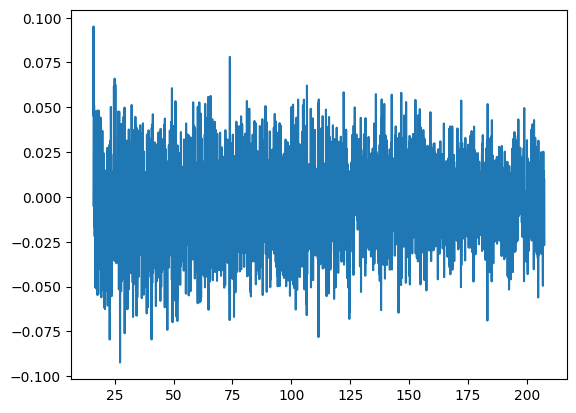

In [93]:
t_sec = 20
s0 = 15.9
s1 = 207
t_start = int(t_sec * s0)
t_end = int(t_sec * s1)

print(np.average(np.gradient(df_temp["temp"])[t_start:t_end]))
plt.plot(df_temp["t"][t_start:t_end], np.gradient(df_temp["temp"])[t_start:t_end])

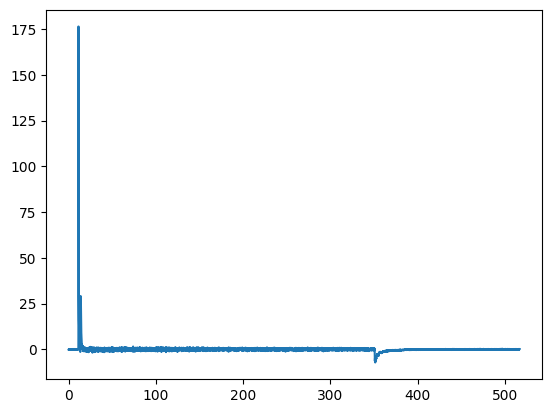

In [94]:
import numpy as np


dTdt = np.gradient(df_temp["temp"], df_temp["t"])


plt.plot(df_temp["t"], dTdt)